In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df  =  pd.read_csv('card_transdata.csv')

In [3]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
model =  LogisticRegression()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [8]:
X  = df.drop(['fraud'],axis =1)
y =  df['fraud']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)
X_train,X_val,y_train,y_val =  train_test_split(X_train,y_train,test_size=0.2,random_state=21)


In [10]:
X_val

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
610131,1.515825,8.470277,1.508465,0.0,0.0,0.0,0.0
931234,167.552790,0.469252,0.534126,1.0,1.0,1.0,0.0
180177,3.080724,12.043227,2.546318,1.0,0.0,0.0,0.0
929163,103.937794,0.447033,4.794254,1.0,0.0,1.0,1.0
195308,28.645903,0.848547,0.122286,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
174303,0.313876,1.022229,0.216316,0.0,1.0,0.0,1.0
573627,2.876870,1.066298,0.440882,1.0,0.0,0.0,1.0
706924,68.950378,4.540762,0.352962,1.0,0.0,0.0,0.0
604817,17.837547,8.079328,0.166027,1.0,1.0,0.0,1.0


<AxesSubplot: xlabel='distance_from_home', ylabel='Count'>

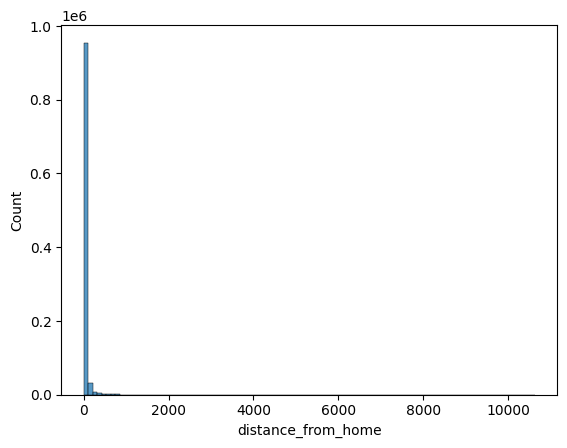

In [11]:
sns.histplot(x = 'distance_from_home',data = df,bins = 100)

Text(0.5, 1.0, 'Violin Plots for Multiple Features')

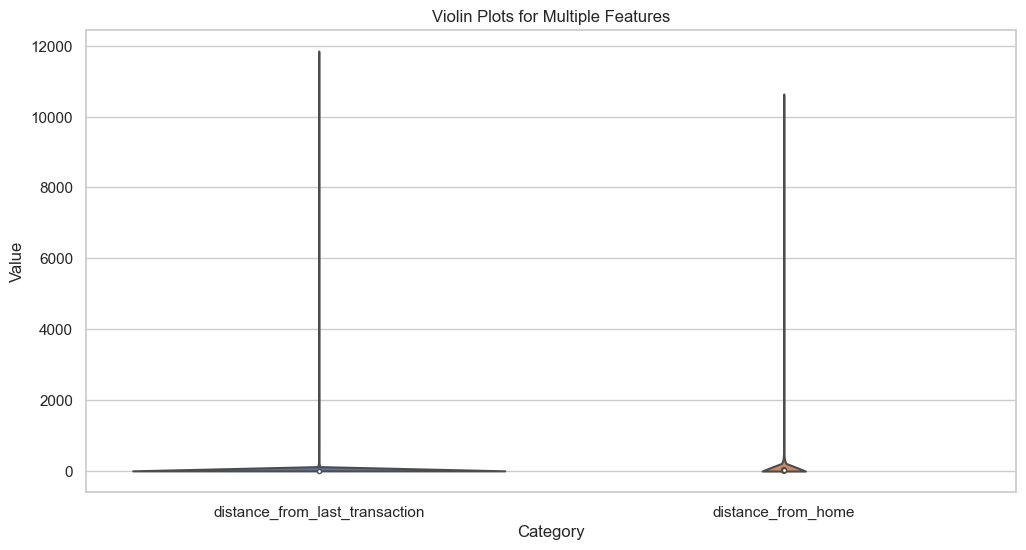

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6)) 
ax  = sns.violinplot(data =  df[['distance_from_last_transaction','distance_from_home']])
plt.xlabel("Category")
plt.ylabel("Value")
plt.title("Violin Plots for Multiple Features")

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale =  StandardScaler()

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define which features to scale and which to leave unchanged
scaling_columns = [0,1]  
unchanged_columns = [2,3,4,5,6]

# Create a ColumnTransformer with different preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), scaling_columns),
        ('passthrough', 'passthrough', unchanged_columns)  # Leave other columns unchanged
    ])

# Apply the preprocessing to your training data
X_train_1 = preprocessor.fit_transform(X_train)

In [16]:
X_train_1

array([[ 1.31590987, -0.13806763,  2.29339236, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.01552887,  0.17843104,  1.73602939, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31063888,  1.00696442,  4.05756406, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.33172109, -0.16865314,  0.53217294, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31795722, -0.05712978,  1.98646725, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3032626 , -0.10773251,  3.91778515, ...,  0.        ,
         1.        ,  0.        ]])

In [17]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE()

X_train_1,y_train = smote.fit_resample(X_train_1, y_train)


In [18]:
y_train.value_counts()

0.0    583961
1.0    583961
Name: fraud, dtype: int64

In [19]:
model.fit(X_train_1,y_train)

LogisticRegression()

In [20]:
model.coef_

array([[  1.9303078 ,   1.34941085,   1.21285707,  -1.39759755,
         -1.19398901, -10.8178394 ,   4.98298008]])

In [22]:
X_val_1 =  preprocessor.transform(X_val)

In [23]:
model.score(X_val_1,y_val)

0.93449375

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc  =  RandomForestClassifier()

In [26]:
rfc.fit(X_train_1,y_train)

RandomForestClassifier()

In [27]:
rfc.score(X_val_1,y_val)

0.99999375

In [28]:
y_pred  = rfc.predict(X_val_1)

In [29]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print(cm)

[[146117      0]
 [     1  13882]]


In [30]:
X_test_1  = preprocessor.transform(X_test)

In [31]:
rfc.score(X_test_1,y_test)

0.99999

In [32]:
import pickle as pkl

In [33]:
with open('rfc_model_credit_card_detection.pkl','wb') as file:
    pkl.dump(rfc,file)